# Modelos ML

In [50]:
#Importamos librerías preliminares a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import SCORERS
from sklearn import model_selection
import functions

In [10]:
#Importamos la data de los pozos
Well_1 = pd.read_csv("../data/raw/Well_1_mincols.csv", sep=";")
Well_3 = pd.read_csv("../data/processed/Well_3_modeldata.csv", sep=",")

In [38]:
#Importamos módulos para generar el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
#Train test split

X = Well_3[["DT","GR","RHOB", "RLLD_log"]]
Y = Well_3["NPHI"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Linear regression

In [14]:
#Modelo pipeline
model_pipeline_lr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())])


model_pipeline_lr.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [27]:
#Mean absolute error
print("MAE: ", mean_absolute_error(Y_test,model_pipeline_lr.predict(X_test)))

#Cross validation
name="Linear regression"
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_pipeline_lr, X, Y, cv=kfold, scoring="neg_mean_absolute_error")

mae = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(mae)

MAE:  0.035369379558913255
[-0.03064893 -0.05027223 -0.03039857 -0.03296972 -0.02729581 -0.03614868
 -0.02953356 -0.04978242 -0.04560527 -0.03434099]
Linear regression: -0.036700 (0.008189)


### Polynomial linear regression

In [28]:
#Modelo pipeline
model_pipeline_plr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("poly_transform", PolynomialFeatures(degree = 2)),
    ("regression", LinearRegression())])


model_pipeline_plr.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_transform', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [30]:
#Mean absolute error
print("MAE: ", mean_absolute_error(Y_test,model_pipeline_plr.predict(X_test)))

#Cross validation
name="Polinomial linear regression"
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_pipeline_plr, X, Y, cv=kfold, scoring="neg_mean_absolute_error")

mae = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(mae)

MAE:  0.033146973879185686
[-0.0331865  -0.05438578 -0.02993536 -0.03075455 -0.02728083 -0.03363702
 -0.02866684 -0.04385166 -0.04508385 -0.04306408]
Polinomial linear regression: -0.036985 (0.008544)


### Random forest regressor

In [35]:
#Modelo pipeline
model_pipeline_rfr = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("regression", RandomForestRegressor(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42,
                                 oob_score=True))])


model_pipeline_rfr.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression',
                 RandomForestRegressor(max_leaf_nodes=16, n_estimators=500,
                                       oob_score=True, random_state=42))])

In [36]:
#Mean absolute error
print("MAE: ", mean_absolute_error(Y_test,model_pipeline_rfr.predict(X_test)))

#Cross validation
name="Random forest regressor"
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model_pipeline_rfr, X, Y, cv=kfold, scoring="neg_mean_absolute_error")

mae = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(mae)

MAE:  0.03081837498855588
[-0.03474281 -0.05312772 -0.03229911 -0.03176904 -0.02815428 -0.03339368
 -0.02959253 -0.04689164 -0.04241921 -0.03272791]
Random forest regressor: -0.036512 (0.007771)


### Neural networks

In [43]:
model_nn = keras.models.Sequential()

capas = [
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(1)
]

model_nn = keras.models.Sequential(capas)


model_nn.compile(loss = "mae",
             optimizer = "adam",
             metrics = "mae")

In [44]:
history = model_nn.fit(X_train,
                   Y_train,
                   epochs = 200,
                   validation_split = 0.20)

Epoch 1/200
129/129 [==============================] - 2s 6ms/step - loss: 0.7398 - mae: 0.7398 - val_loss: 0.6255 - val_mae: 0.6255
Epoch 2/200
129/129 [==============================] - 0s 4ms/step - loss: 0.3330 - mae: 0.3330 - val_loss: 0.3195 - val_mae: 0.3195
Epoch 3/200
129/129 [==============================] - 0s 4ms/step - loss: 0.2954 - mae: 0.2954 - val_loss: 0.2229 - val_mae: 0.2229
Epoch 4/200
129/129 [==============================] - 0s 3ms/step - loss: 0.2749 - mae: 0.2749 - val_loss: 0.1326 - val_mae: 0.1326
Epoch 5/200
129/129 [==============================] - 0s 3ms/step - loss: 0.2762 - mae: 0.2762 - val_loss: 0.3618 - val_mae: 0.3618
Epoch 6/200
129/129 [==============================] - 0s 4ms/step - loss: 0.2500 - mae: 0.2500 - val_loss: 0.3163 - val_mae: 0.3163
Epoch 7/200
129/129 [==============================] - 0s 4ms/step - loss: 0.2631 - mae: 0.2631 - val_loss: 0.8533 - val_mae: 0.8533
Epoch 8/200
129/129 [==============================] - 0s 4ms/step - 

### Selección final

Finalmente por su buen resultado y su bajo costo computacional seleccionamos el modelo de "Polynomial linear regression". El mismo se desempeña mejor que el modelo de regresión lineal al mantener mejor la tendecia de la curva NPHI original y reparar las zonas con errores, esto se puede observar gráficamente.

In [51]:
Well_1[["DEPTH","CAL","DT","GR", "RLLD", "RT", "BS"]] = \
    Well_1[["DEPTH","CAL","DT","GR", "RLLD", "RT", "BS"]].apply(functions.col_to_float, axis=1)

In [52]:
Well_1["DEPTH"] = Well_1["DEPTH"]/10000
Well_1["CAL"] = Well_1["CAL"]/10000
Well_1["DT"] = Well_1["DT"]/10000
Well_1["GR"] = Well_1["GR"]/10000
Well_1["RHOB"] = Well_1["RHOB"]/10
Well_1["RLLD"] = Well_1["RLLD"]/10000
Well_1["RT"] = Well_1["RT"]/10000
Well_1["BS"] = Well_1["BS"]/10000

In [53]:
Well_1["BS"] = np.where(Well_1["BS"] > 15, 9.25, Well_1["BS"])

In [54]:
Well_1["positive_flag"] = Well_1[Well_1["NPHI"] > 0.30]["NPHI"]
Well_1["negative_flag"] = Well_1[Well_1["NPHI"] < 0]["NPHI"]

In [55]:
Well_1["BS"] = np.where(Well_1["BS"] > 15, 9.25, Well_1["BS"])

In [56]:
Well_1["RLLD_log"] = np.log(Well_1["RLLD"])

In [57]:
Well_1.drop(["positive_flag", "negative_flag"], axis=1, inplace=True) #Eliminamos los flags para luego eliminar los inf de RLLD_log
Well_1.replace([np.inf, -np.inf], np.nan, inplace=True)#Eliminamos valores infinitos, no aceptados el modelo
Well_1.dropna(inplace=True)#Eliminamos NaNs que pudieron surgir en previas transformaciones

In [58]:
#Train test

X_w1 = Well_1[["DT","GR","RHOB", "RLLD_log"]]
Y_w1 = Well_1["NPHI"]

In [59]:
Well_1["NPHI_linear_predict"] = model_pipeline_lr.predict(X_w1) #Prediccion de NPHI lr Well_1

In [60]:
Well_1["NPHI_poly_predict"] = model_pipeline_plr.predict(X_w1) #Prediccion de NPHI plr Well_1

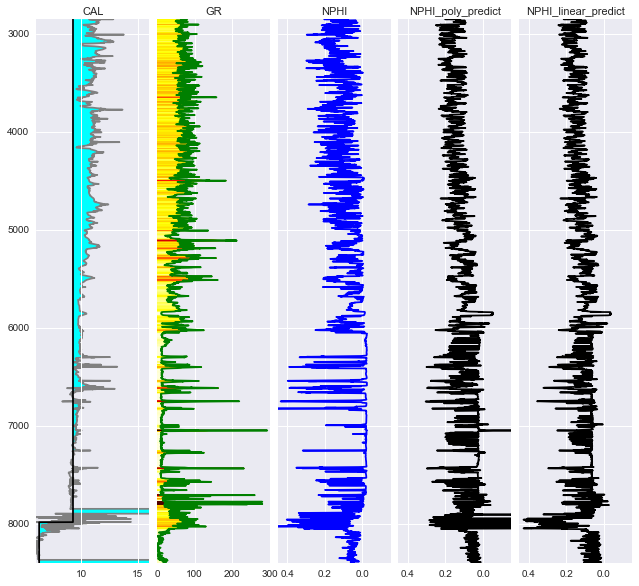

In [64]:
plt.style.use("seaborn")
fig, axes = plt.subplots(figsize= (15,10))

ax0 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan=1)
ax1 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan=1)
ax9 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan=1)
ax10 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan=1)
ax4 = ax0.twiny()


ax0.plot("CAL", "DEPTH", data= Well_1, color= "gray")
ax0.set_xlabel("CAL")
ax0.set_xlim(6,16)
ax0.set_ylim(8400,2854)
ax0.grid(10)

ax0.fill_betweenx(Well_1["DEPTH"], Well_1["BS"], Well_1["CAL"],where=Well_1["CAL"]>=Well_1["BS"],facecolor='cyan')

ax1.plot("GR", "DEPTH", data= Well_1, color= "green")
ax1.set_xlabel("GR")
ax1.set_xlim(0,300)
ax1.set_ylim(8400,2854)
ax1.grid(10)

left_value = 0
right_value = 300
span = abs(left_value-right_value)

cmap=plt.get_cmap('hot_r')

color_index = np.arange(left_value, right_value, span/100)
for index in sorted(color_index):
    index_value = (index - left_value)/span
    color = cmap(index_value)
    ax1.fill_betweenx(Well_1['DEPTH'], left_value, Well_1['GR'], where=Well_1['GR']>=index, color=color)

ax3.plot("NPHI", "DEPTH", data= Well_1, color= "blue")
ax3.set_xlabel("NPHI")
ax3.set_xlim(0.45,-0.15)
ax3.set_ylim(8400,2854)
ax3.grid(10)

ax4.plot("BS", "DEPTH", data= Well_1, color= "black")
ax4.set_xlim(6,16)
ax4.set_ylim(8400,2854)
ax4.grid(10)

ax9.plot("NPHI_poly_predict", "DEPTH", data= Well_1, color= "black")
ax9.set_xlabel("NPHI_poly_predict")
ax9.set_xlim(0.45,-0.15)
ax9.set_ylim(8400,2854)
ax9.grid(10)

ax10.plot("NPHI_linear_predict", "DEPTH", data= Well_1, color= "black")
ax10.set_xlabel("NPHI_linear_predict")
ax10.set_xlim(0.45,-0.15)
ax10.set_ylim(8400,2854)
ax10.grid(10)

ax0.xaxis.set_label_position("top")
ax1.xaxis.set_label_position("top")
ax3.xaxis.set_label_position("top")
ax9.xaxis.set_label_position("top")
ax10.xaxis.set_label_position("top")


plt.setp(ax1.get_yticklabels(), visible = False)
plt.setp(ax3.get_yticklabels(), visible = False)
plt.setp(ax4.get_xticklabels(), visible = False)
plt.setp(ax9.get_yticklabels(), visible = False)
plt.setp(ax10.get_yticklabels(), visible = False)
fig.subplots_adjust(wspace = 0.07)
# plt.savefig("w1_comparative.png")

El NPHI linear mantiene tendencias mayores a 0.30 en la zona de casing, el NPHI polinómico nos arroja algo de información.